Using Tensorflow 1.14.0
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
0.3045604 0.89159185 [[5]]
120.70756512369792
-4.9670536e-08 1.0 [[4]]
-0.12676418 0.40386057 [[1]]


C:\Users\admin\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
9412608/9406464 [==============================] - 29s 3us/step


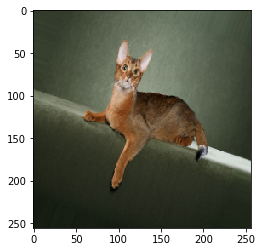

In [7]:
# IMPORTING LIBRARIES


%matplotlib inline

import os
import numpy as np
import tensorflow as tf 
from PIL import Image
from matplotlib import pyplot as plt

print('Using Tensorflow', tf.__version__)



# ROTATION
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    rotation_range=40
)

image_path = 'Image_Data_Augmentation/images/train/cat.jpg'
plt.imshow(plt.imread(image_path));

x, y = next(generator.flow_from_directory('Image_Data_Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));



# WIDTH AND HEIGHT SHIFTS
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    width_shift_range=[-100, -50, 0, 50, 100],
    height_shift_range=[-50, 0, 50]
)

x, y = next(generator.flow_from_directory('Image_Data_Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));



# BRIGHTNESS
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    brightness_range=(0.5, 2.0)
)

x, y = next(generator.flow_from_directory('Image_Data_Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));



# SHEAR TRANSFORMATION
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    shear_range=40
)

x, y = next(generator.flow_from_directory('Image_Data_Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));



# ZOOM
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('Image_Data_Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));



# CHANNEL SHIFTS
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('Image_Data_Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# to compare the original and the modified image
# x.mean() - it gives the modified image number
# np.array(Image.open(image_path)).mean - it gives the number of original image



# FLIPS
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30   
)

x, y = next(generator.flow_from_directory('Image_Data_Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));



# DATA NORMALIZATION
# featurewise
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    featurewise_center=True,
    featurewise_std_normalization=True
    
)

generator.fit(x_train)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

# samplewise
generator=tf.keras.preprocessing.image.ImageDataGenerator (
    samplewise_center=True,
    samplewise_std_normalization=True    
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)



# RESCALE AND PREPRCOESSING FUNCTION
generator = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)


In [8]:
# USING IN MODEL TRAINING
generator = tf.keras.preprocessing.image.ImageDataGenerator (
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

model=tf.keras.models.Sequential ([
    tf.keras.applications.mobilenet_v2.MobileNetV2 (
        include_top=False, input_shape=(32, 32, 3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


_ = model.fit (
    generator.flow(x_train, y_train, batch_size=32),
    epochs=1, steps_per_epoch=10

)


10/10 [==============================] - 59s 6s/step - loss: 2.5729 - acc: 0.1031
